# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [43]:
import pandas as pd

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [44]:
def num_nans(df):
    count = 0
    for index, row in df.iterrows():
        for c in df.columns:
            if pd.isna(row[c]):
                count += 1
                break
                
    return len(df) - count
print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 183 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [45]:
def drop_na(df):
    new = df
    for c in df.columns:
        count = 0
        for row in df[c]:
            if pd.isna(row):
                count += 1
            if count > 200:
                new = new.drop(c, axis=1)
                break
    return new

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [46]:
def to_numerical(df):
    result = []
    for index, row in df.iterrows():
        if row.Sex == 'male':
            result.append(0)
        elif row.Sex == 'female':
            result.append(1) 
    return result

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [47]:
def extract_names(df):
    result = []
    for index, row in df.iterrows():
        name = row.Name.replace('"', '').strip()
        fullname = name.split(",")
        lastName = fullname[0]
        fullname = fullname[1].strip().split('.', 1)
        title = fullname[0]
        fullname = fullname[1].strip().split(' ')
        
        index = 0
        firstName = fullname[index]
        if '(' in firstName:
            firstName = firstName.replace('(', '')
            while ')' not in firstName:
                index += 1
                firstName += fullname[index]
            firstName = firstName.replace(')', '')
        
        index += 1
        if index >= len(fullname):
            middleName = ''
        else:
            middleName = fullname[index]
        if '(' in middleName:
            middleName = middleName.replace('(', '')
            while ')' not in middleName:
                index += 1
                middleName += fullname[index]
            middleName = middleName.replace(')', '')
        result.append([firstName, middleName, lastName, title])
    return result

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [48]:
def replace_with_mean(df):
    result = []
    mean = df.Age.mean()
    for index, row in df.iterrows():
        if pd.isna(row.Age):
            result.append(mean)
        else:
            result.append(row.Age)
    return result

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

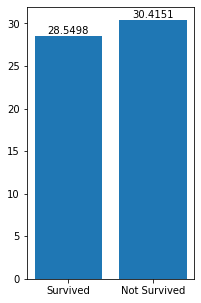

In [49]:
# your code here
import matplotlib.pyplot as plt

survive = df[df.Survived == 1]['Age'].mean()
notSurvive = df[df.Survived == 0]['Age'].mean()

fig, ax = plt.subplots(figsize=(3,5))
p = ax.bar([0, 1], [survive, notSurvive], tick_label=['Survived', 'Not Survived'])
ax.bar_label(p)
plt.show()

-> your answer here  
The average age of the two group is almost same which means age is not the primitive factor of survive.

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

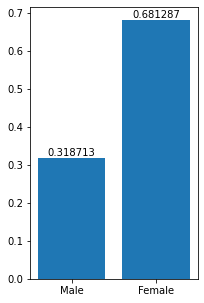

In [50]:
# your code here
import matplotlib.pyplot as plt

male = df[(df.Survived == 1) & (df.Sex == 0)]
female = df[(df.Survived == 1) & (df.Sex == 1)]
sum = len(male) + len(female)

fig, ax = plt.subplots(figsize=(3,5))
p = ax.bar([0, 1], [len(male) / sum, len(female) / sum], tick_label=['Male', 'Female'])
ax.bar_label(p)
plt.show()

-> your answer here  
Female is more likely to survive than male.

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

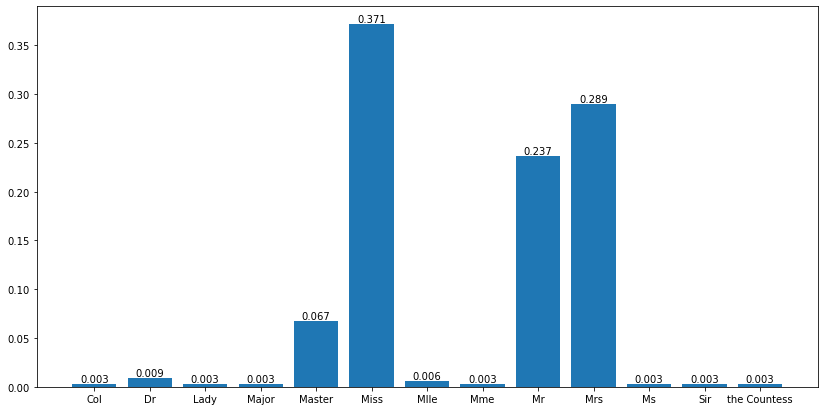

In [51]:
# your code here
group = df[df.Survived == 1].groupby('Title')
title = []
size = []
sum = 0
for key, value in group:
    title.append(key)
    size.append(len(value))
    sum += len(value)
size = [s / sum for s in size]

fig, ax = plt.subplots(figsize=(14,7))
p = ax.bar(range(len(title)), size, tick_label=title)
ax.bar_label(p, fmt="%.3f")
plt.show()

-> your answer here  
A large of people who survived has the title of Mr, Miss, or Mrs, in which Miss is the largest.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

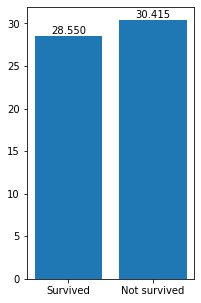

In [52]:
# your code here
survived = df[df.Survived == 1].Fare.mean()
notSurvived = df[df.Survived == 0].Fare.mean()

fig, ax = plt.subplots(figsize=(3,5))
p = ax.bar([0, 1], [survive, notSurvive], tick_label=['Survived', 'Not survived'])
ax.bar_label(p, fmt="%.3f")
plt.show()

-> your answer here  
The average fare of the tow group is close, which means fare is not the primitive factor of survive.

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

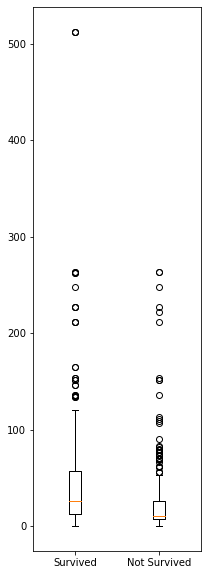

In [53]:
# your code here
survive = df[df.Survived == 1].Fare
notSurvive = df[df.Survived == 0].Fare

fig, ax = plt.subplots(figsize=(3, 10))
p = ax.boxplot([survive, notSurvive], labels=['Survived', 'Not Survived'])
plt.show()

-> your answer here  
The fare of not survived focused on cheaper range than people who survived, which meams they prefer to buy cheaper fare.

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [54]:
# your code here
def normalization_fare(df):
    mean = df.Fare.mean()
    std = df.Fare.std()
    result = []

    for fare in df.Fare:
        result.append((fare - mean) / std)
    return result

df.Fare = normalization_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [55]:
df.index = df.Name
df = df.select_dtypes(include=['int64','float64'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Name,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,0,22.0,1,0,-0.502163
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,1,38.0,1,0,0.786404
"Heikkinen, Miss. Laina",3,1,3,1,26.0,0,0,-0.488580
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,1,35.0,1,0,0.420494
"Allen, Mr. William Henry",5,0,3,0,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? - (15 points)

In [56]:
def N_most_similar(df, N):
    minimum = []

    for name1, row1 in df.iterrows():
        for name2, row2 in df.loc[name1:].iterrows():
            # skip itself
            if name1 == name2:
                continue
            
            # calc eucludian distance
            distance = 0
            for c in range(1, len(row1)):
                distance += (row1[c] + row2[c]) ** 2
            distance **= 0.5

            # sort minimum and remove largest
            minimum.append((distance, name1, name2))
            minimum.sort(key = lambda x: x[0])
            if len(minimum) > N:
                minimum = minimum[:-1]      

    return [(min[1], min[2]) for min in minimum]
    # return minimum
                    
print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

The 3 most similar passengers are: [('Hamalainen, Master. Viljo', 'Richards, Master. George Sibley'), ('Caldwell, Master. Alden Gates', 'Hamalainen, Master. Viljo'), ('Allison, Master. Hudson Trevor', 'Hamalainen, Master. Viljo')]


## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [62]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

python = get("Python")
data_science = get("Data Science")
data_analytics = get("Data Analysis")
machine_learning = get("Machine Learning")
deep_learning = get("Deep Learning")

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [58]:
books_py = pd.json_normalize(python["items"])
books_py.to_csv('python.csv')
books_ds = pd.json_normalize(data_science["items"])
books_ds.to_csv('data_science.csv')
books_da = pd.json_normalize(data_analytics["items"])
books_da.to_csv('data_analytics.csv')
books_ml = pd.json_normalize(machine_learning["items"])
books_ml.to_csv('machine_learning.csv')
books_dl = pd.json_normalize(deep_learning["items"])
books_dl.to_csv('deep_learning.csv')

books_py.head()

,kind,id,etag,selfLink,volumeInfo.title,volumeInfo.subtitle,volumeInfo.authors,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,searchInfo.textSnippet,volumeInfo.publisher,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink
0,books#volume,zjqzDAEACAAJ,IFZYhbfmDhA,https://www.googleapis.com/books/v1/volumes/zj...,Python for Everybody,Exploring Data in Python 3,[Charles R. Severance],2016-04-09,Python for Everybody is designed to introduce ...,"[{'type': 'ISBN_10', 'identifier': '1530051126...",...,&quot;Designed to teach people to program even...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,books#volume,aTkzEAAAQBAJ,B/2BC3N3/f0,https://www.googleapis.com/books/v1/volumes/aT...,The Quick Python Book,NaN,[Naomi Ceder],2018-05-03,Summary This third revision of Manning's popul...,"[{'type': 'ISBN_13', 'identifier': '9781638353...",...,Python programmers are in high demand/mdash;yo...,Simon and Schuster,[Computers],30.99,USD,30.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/The_Qui...
2,books#volume,Chr1NDlUcI8C,7OH3gQsDS8s,https://www.googleapis.com/books/v1/volumes/Ch...,Python Essential Reference,NaN,[David M. Beazley],2009,Presents a guide to the features and library m...,"[{'type': 'ISBN_13', 'identifier': '9780672329...",...,Presents a guide to the features and library m...,Addison-Wesley Professional,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,books#volume,bTUFCAAAQBAJ,Qg5D//SkKho,https://www.googleapis.com/books/v1/volumes/bT...,Effective Python,59 Specific Ways to Write Better Python,[Brett Slatkin],2015,"""It's easy to start writing code with Python: ...","[{'type': 'ISBN_13', 'identifier': '9780134034...",...,Effective Python will help students harness th...,Pearson Education,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,books#volume,s_qTvgEACAAJ,3s617XLtiEE,https://www.googleapis.com/books/v1/volumes/s_...,Violent Python,"A Cookbook for Hackers, Forensic Analysts, Pen...",[TJ O'Connor],2012-11-22,Violent Python shows you how to move from a th...,"[{'type': 'ISBN_10', 'identifier': '1597499579...",...,This book demonstrates how to write Python scr...,Syngress,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN


c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [60]:
books_py.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
books_ds.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
books_da.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
books_ml.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
books_dl.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)

books_py.head()

,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Authors,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,searchInfo.textSnippet,volumeInfo.publisher,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink
0,books#volume,zjqzDAEACAAJ,IFZYhbfmDhA,https://www.googleapis.com/books/v1/volumes/zj...,Python for Everybody,Exploring Data in Python 3,[Charles R. Severance],2016-04-09,Python for Everybody is designed to introduce ...,"[{'type': 'ISBN_10', 'identifier': '1530051126...",...,&quot;Designed to teach people to program even...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,books#volume,aTkzEAAAQBAJ,B/2BC3N3/f0,https://www.googleapis.com/books/v1/volumes/aT...,The Quick Python Book,NaN,[Naomi Ceder],2018-05-03,Summary This third revision of Manning's popul...,"[{'type': 'ISBN_13', 'identifier': '9781638353...",...,Python programmers are in high demand/mdash;yo...,Simon and Schuster,[Computers],30.99,USD,30.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/The_Qui...
2,books#volume,Chr1NDlUcI8C,7OH3gQsDS8s,https://www.googleapis.com/books/v1/volumes/Ch...,Python Essential Reference,NaN,[David M. Beazley],2009,Presents a guide to the features and library m...,"[{'type': 'ISBN_13', 'identifier': '9780672329...",...,Presents a guide to the features and library m...,Addison-Wesley Professional,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,books#volume,bTUFCAAAQBAJ,Qg5D//SkKho,https://www.googleapis.com/books/v1/volumes/bT...,Effective Python,59 Specific Ways to Write Better Python,[Brett Slatkin],2015,"""It's easy to start writing code with Python: ...","[{'type': 'ISBN_13', 'identifier': '9780134034...",...,Effective Python will help students harness th...,Pearson Education,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,books#volume,s_qTvgEACAAJ,3s617XLtiEE,https://www.googleapis.com/books/v1/volumes/s_...,Violent Python,"A Cookbook for Hackers, Forensic Analysts, Pen...",[TJ O'Connor],2012-11-22,Violent Python shows you how to move from a th...,"[{'type': 'ISBN_10', 'identifier': '1597499579...",...,This book demonstrates how to write Python scr...,Syngress,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN


d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [66]:
books_py['Topic'] = 'Python'
books_ds['Topic'] = 'Data Science'
books_da['Topic'] = 'Data Analysis'
books_ml['Topic'] = 'Machine Learning'
books_dl['Topic'] = 'Deep Learning'

books_all = pd.concat([books_py, books_ds, books_da, books_ml, books_dl])
books_all.reset_index(inplace=True)
books_all.to_csv('all.csv')

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [77]:
def title_with_data(books):
    return books.loc[books.Title.str.contains('Data')] 

title_with_data(books_all).head()

,index,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Authors,volumeInfo.publishedDate,volumeInfo.description,...,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic,accessInfo.pdf.acsTokenLink
7,7,books#volume,6omNDQAAQBAJ,ANwzC73c6xA,https://www.googleapis.com/books/v1/volumes/6o...,Python Data Science Handbook,Essential Tools for Working with Data,[Jake VanderPlas],2016-11-21,"For many researchers, Python is a first-class ...",...,[Computers],59.99,USD,59.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,Python,NaN
10,0,books#volume,vfi3DQAAQBAJ,Rwf3Z/oY1Sk,https://www.googleapis.com/books/v1/volumes/vf...,R for Data Science,"Import, Tidy, Transform, Visualize, and Model ...","[Hadley Wickham, Garrett Grolemund]",2016-12-12,"""This book introduces you to R, RStudio, and t...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN
11,1,books#volume,TFpVDwAAQBAJ,aOIMjyfpZmM,https://www.googleapis.com/books/v1/volumes/TF...,Data Science,NaN,"[John D. Kelleher, Brendan Tierney]",2018-04-13,A concise introduction to the emerging field o...,...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN
12,2,books#volume,6omNDQAAQBAJ,qS/t9RMvttY,https://www.googleapis.com/books/v1/volumes/6o...,Python Data Science Handbook,Essential Tools for Working with Data,[Jake VanderPlas],2016-11-21,"For many researchers, Python is a first-class ...",...,[Computers],59.99,USD,59.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,Data Science,NaN
13,3,books#volume,xb29DwAAQBAJ,7wxxlK5eOFw,https://www.googleapis.com/books/v1/volumes/xb...,Introduction to Data Science,Data Analysis and Prediction Algorithms with R,[Rafael A. Irizarry],2019-11-20,Introduction to Data Science: Data Analysis an...,...,[Mathematics],NaN,NaN,NaN,NaN,NaN,NaN,http://books.google.com/books/download/Introdu...,Data Science,http://books.google.com/books/download/Introdu...


f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [96]:
def author_start_with_e(books):
    result = []
    for index, row in books.iterrows():
        for name in row.Authors:
            names = name.split(' ')
            if names[0].startswith('E') or name[-1].endswith('E'):
                result.append(index)
                break
    return books.loc[result]

author_start_with_e(books_all).head()

,index,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Authors,volumeInfo.publishedDate,volumeInfo.description,...,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic,accessInfo.pdf.acsTokenLink
16,6,books#volume,xDszEAAAQBAJ,T2kMuJNd9LE,https://www.googleapis.com/books/v1/volumes/xD...,Build a Career in Data Science,NaN,"[Emily Robinson, Jacqueline Nolis]",2020-03-06,Summary You are going to need more than techni...,...,[Computers],28.99,USD,28.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Build_a...,Data Science,NaN
19,9,books#volume,UG76DwAAQBAJ,uaReyhjKKG8,https://www.googleapis.com/books/v1/volumes/UG...,Data Science in Education Using R,NaN,"[Ryan A. Estrellado, Emily A. Freer, Jesse Mos...",2020-10-26,Data Science in Education Using R is the go-to...,...,[Education],48.95,USD,37.69,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Data_Sc...,Data Science,http://books.google.com/books/download/Data_Sc...
33,3,books#volume,NP5bBAAAQBAJ,6Cyozx92ShY,https://www.googleapis.com/books/v1/volumes/NP...,Introduction to Machine Learning,NaN,[Ethem Alpaydin],2014-08-29,The goal of machine learning is to program com...,...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine Learning,NaN
34,4,books#volume,AGQ4DQAAQBAJ,zrJtq9l6juw,https://www.googleapis.com/books/v1/volumes/AG...,Machine Learning,The New AI,[Ethem Alpaydin],2016-10-07,A concise overview of machine learning—compute...,...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine Learning,NaN
45,5,books#volume,LrT4DwAAQBAJ,MkjXCv291UQ,https://www.googleapis.com/books/v1/volumes/Lr...,Introduction to Deep Learning,NaN,[Eugene Charniak],2019-01-29,A project-based guide to the basics of deep le...,...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deep Learning,NaN
